True center:  [[1, 1], [5, 5], [3, 10]]


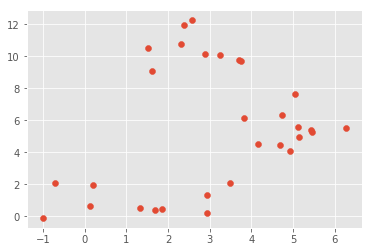

In [3]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

centers = [[1,1],[5,5],[3,10]]
X, true_label = make_blobs(n_samples = 30, centers = centers, cluster_std = 1)
print("True center: ", centers)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
class Mean_Shift:
    
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit(self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
            print("All data center: ",all_data_centroid)
            print("All data norm: ",all_data_norm)
            print("Radius",self.radius)
            
        # 1. initial centroids as datapoint itself for all datapoints
        centroids = data.copy()
        # define weight
        weights = [i for i in range(self.radius_norm_step)][::-1]
        # Start iteration for update centroids
        while True:
            new_centroids = []
            for centroid in centroids:
                in_bandwidth = []
                # if datapoint within centroid's radius, it's in bandwidth
                for featureset in data:
                    #if np.linalg.norm(featureset-centroid) < self.radius:
                    #   in_bandwidth.append(featureset)
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add
                    print("Current centroid: ", centroid)
                    print("Current point: ", featureset)
                    print(weight_index)
                    print("Current point repeat times: ",len(to_add))
                print("Accumlated repeat points: ", len(in_bandwidth))
                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))
                #print(new_centroids)
                
            # get ride of repeated centroids
            unique_centroids = sorted(list(set(new_centroids)))
            # get ride of very close centorid points
            to_pop = []
            for i in unique_centroids:
                for ii in unique_centroids:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii))<= self.radius:
                        print(np.array(i)," is very close to point ", np.array(ii))
                        to_pop.append(ii)
                        break
            for centroid in to_pop:
                try:
                    unique_centroids.remove(centroid)
                except:
                    pass
            
            #print(unique_centroids)
            prev_centroids = centroids.copy()
            centroids = unique_centroids.copy()
            #print("P: ",prev_centroids)
            #print("C: ",centroids)
            optimized = True
            if not np.array_equal(centroids, prev_centroids):
                optimized = False
            if optimized:
                break
        self.centroids = [list(elem) for elem in centroids]
        
    def predict(self,data):
        result_label = []
        #compare distance to either centroid
        for point in data:
            distances = [np.linalg.norm(point-centroid) for centroid in self.centroids]
            label = (distances.index(min(distances)))
            result_label.append(label)
            #print(distances)
            #print(label)
        return result_label

1. Make all datapoints as centroids <br>
2. Take mean of all datapoints within centroid's radius, setting this mean as new centroid. <br>
For example, with a candidate centroid $x_i$ for $t$ iteration, the candidate centroid is updated according to the following equation: \begin{equation}x_i^{t+1} = m(x_i^t)\end{equation} where for each iteration $t$, we update our centroid to be the mean of the samples within its neighborhood using below equation:  \begin{equation}m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}\end{equation} where $N(x_i)$ is the neighborhood of samples within a given distance around $x_i$, $K(x_j - x_i)$ is an kernel function. Gaussian kernel on the distance to the current estimate is used in my program.
3. Repeat step 2 until convergence. <br>

4. Dynamically Weighted Bandwidth for mean shift. <br>
Now, if we want to have a dynamically weighted bandwidth, we need to introduce an weight to mean shift. 
    1. We first define a step variable
    2. We find the norm of all input data, then divide by step variable and use result as radius (It's an step radius)
    3. Define a weight $w$ that track which point is closer to centroid. We repeatly add datapoint $w^2$ times to a list         (list that track which point close to centroid) instead add it once. When we perform average, it will move the centroid     closer to datapoint have higher weight
    4. Get ride of very close centorid points by simplely check whether they are very close to each other or not.


All data center:  [5.83333333 4.26666667]
All data norm:  7.22718632817933
Radius 0.0722718632817933
Current centroid:  [1. 2.]
Current point:  [1. 2.]
0
Current point repeat times:  9801
Current centroid:  [1. 2.]
Current point:  [1.5 1.8]
7
Current point repeat times:  8464
Current centroid:  [1. 2.]
Current point:  [5. 8.]
99
Current point repeat times:  0
Current centroid:  [1. 2.]
Current point:  [8. 8.]
99
Current point repeat times:  0
Current centroid:  [1. 2.]
Current point:  [1.  0.6]
19
Current point repeat times:  6400
Current centroid:  [1. 2.]
Current point:  [ 9. 11.]
99
Current point repeat times:  0
Current centroid:  [1. 2.]
Current point:  [8. 2.]
96
Current point repeat times:  9
Current centroid:  [1. 2.]
Current point:  [10.  2.]
99
Current point repeat times:  0
Current centroid:  [1. 2.]
Current point:  [9. 3.]
99
Current point repeat times:  0
Accumlated repeat points:  24674
Current centroid:  [1.5 1.8]
Current point:  [1. 2.]
7
Current point repeat times:  84

Current centroid:  (8.513189275131893, 10.124954831249548)
Current point:  [1. 2.]
99
Current point repeat times:  0
Current centroid:  (8.513189275131893, 10.124954831249548)
Current point:  [1.5 1.8]
99
Current point repeat times:  0
Current centroid:  (8.513189275131893, 10.124954831249548)
Current point:  [5. 8.]
56
Current point repeat times:  1849
Current centroid:  (8.513189275131893, 10.124954831249548)
Current point:  [8. 8.]
30
Current point repeat times:  4761
Current centroid:  (8.513189275131893, 10.124954831249548)
Current point:  [1.  0.6]
99
Current point repeat times:  0
Current centroid:  (8.513189275131893, 10.124954831249548)
Current point:  [ 9. 11.]
13
Current point repeat times:  7396
Current centroid:  (8.513189275131893, 10.124954831249548)
Current point:  [8. 2.]
99
Current point repeat times:  0
Current centroid:  (8.513189275131893, 10.124954831249548)
Current point:  [10.  2.]
99
Current point repeat times:  0
Current centroid:  (8.513189275131893, 10.12495

Current centroid:  (8.950351887396033, 2.5487310727233954)
Current point:  [ 9. 11.]
99
Current point repeat times:  0
Current centroid:  (8.950351887396033, 2.5487310727233954)
Current point:  [8. 2.]
15
Current point repeat times:  7056
Current centroid:  (8.950351887396033, 2.5487310727233954)
Current point:  [10.  2.]
16
Current point repeat times:  6889
Current centroid:  (8.950351887396033, 2.5487310727233954)
Current point:  [9. 3.]
6
Current point repeat times:  8649
Accumlated repeat points:  23159
Current centroid:  (9.028038198229625, 2.448698382243928)
Current point:  [1. 2.]
99
Current point repeat times:  0
Current centroid:  (9.028038198229625, 2.448698382243928)
Current point:  [1.5 1.8]
99
Current point repeat times:  0
Current centroid:  (9.028038198229625, 2.448698382243928)
Current point:  [5. 8.]
94
Current point repeat times:  25
Current centroid:  (9.028038198229625, 2.448698382243928)
Current point:  [8. 8.]
78
Current point repeat times:  441
Current centroid: 

Current point repeat times:  25
Current centroid:  (7.461533779671333, 8.378940961655509)
Current point:  [9. 3.]
77
Current point repeat times:  484
Accumlated repeat points:  16204
Current centroid:  (7.710398832039286, 8.927732430818237)
Current point:  [1. 2.]
99
Current point repeat times:  0
Current centroid:  (7.710398832039286, 8.927732430818237)
Current point:  [1.5 1.8]
99
Current point repeat times:  0
Current centroid:  (7.710398832039286, 8.927732430818237)
Current point:  [5. 8.]
39
Current point repeat times:  3600
Current centroid:  (7.710398832039286, 8.927732430818237)
Current point:  [8. 8.]
13
Current point repeat times:  7396
Current centroid:  (7.710398832039286, 8.927732430818237)
Current point:  [1.  0.6]
99
Current point repeat times:  0
Current centroid:  (7.710398832039286, 8.927732430818237)
Current point:  [ 9. 11.]
33
Current point repeat times:  4356
Current centroid:  (7.710398832039286, 8.927732430818237)
Current point:  [8. 2.]
95
Current point repeat 

Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [1. 2.]
99
Current point repeat times:  0
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [1.5 1.8]
99
Current point repeat times:  0
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [5. 8.]
93
Current point repeat times:  36
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [8. 8.]
77
Current point repeat times:  484
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [1.  0.6]
99
Current point repeat times:  0
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [ 9. 11.]
99
Current point repeat times:  0
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [8. 2.]
15
Current point repeat times:  7056
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [10.  2.]
15
Current point repeat times:  7056
Current centroid:  (8.97302521369357, 2.505519522357287

Current centroid:  (7.475293970477859, 8.49430823117338)
Current point:  [8. 2.]
90
Current point repeat times:  81
Current centroid:  (7.475293970477859, 8.49430823117338)
Current point:  [10.  2.]
96
Current point repeat times:  9
Current centroid:  (7.475293970477859, 8.49430823117338)
Current point:  [9. 3.]
78
Current point repeat times:  441
Accumlated repeat points:  16337
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [1. 2.]
99
Current point repeat times:  0
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [1.5 1.8]
99
Current point repeat times:  0
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [5. 8.]
93
Current point repeat times:  36
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [8. 8.]
77
Current point repeat times:  484
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [1.  0.6]
99
Current point repeat times:  0
Current centroid:  (8.97302521

Current centroid:  (7.454892542644251, 8.445409200073897)
Current point:  [ 9. 11.]
41
Current point repeat times:  3364
Current centroid:  (7.454892542644251, 8.445409200073897)
Current point:  [8. 2.]
89
Current point repeat times:  100
Current centroid:  (7.454892542644251, 8.445409200073897)
Current point:  [10.  2.]
95
Current point repeat times:  16
Current centroid:  (7.454892542644251, 8.445409200073897)
Current point:  [9. 3.]
78
Current point repeat times:  441
Accumlated repeat points:  16246
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [1. 2.]
99
Current point repeat times:  0
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [1.5 1.8]
99
Current point repeat times:  0
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [5. 8.]
93
Current point repeat times:  36
Current centroid:  (8.97302521369357, 2.5055195223572873)
Current point:  [8. 8.]
77
Current point repeat times:  484
Current centroid:  (8.

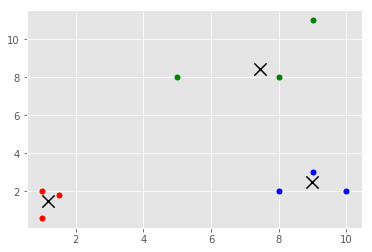

In [5]:
# X = np.array([[1, 1], [2, 1], [1, 0],
#               [4, 7], [3, 5], [3, 6]])
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])
clustering = Mean_Shift()
clustering.fit(X)
labels = clustering.predict(X)
cluster_centers = np.array(clustering.centroids)
print(labels)
print(cluster_centers)
# plot it
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)
plt.show()

Estimate center:  [[ 9.          2.33333333]
 [ 1.16666667  1.46666667]
 [ 9.         11.        ]
 [ 8.          8.        ]
 [ 5.          8.        ]]
Number of estimated clusters: 5


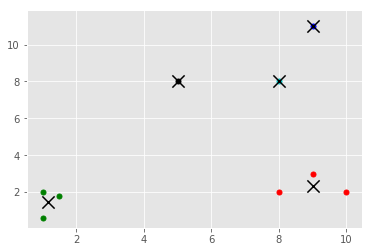

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print("Estimate center: ", cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

# plot it
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [30]:
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import check_array, check_random_state, gen_batches

def estimate_bandwidth(X, quantile=0.3, n_samples=None, random_state=0):
    X = check_array(X)

    random_state = check_random_state(random_state)
    if n_samples is not None:
        idx = random_state.permutation(X.shape[0])[:n_samples]
        X = X[idx]
    
    print(X.shape[0])
    print(quantile)
    n_neighbors = int(X.shape[0] * quantile)
    print(n_neighbors)
    if n_neighbors < 1:  # cannot fit NearestNeighbors with n_neighbors = 0
        n_neighbors = 1
    nbrs = NearestNeighbors(n_neighbors=n_neighbors,n_jobs=None)
    nbrs.fit(X)

    bandwidth = 0.
    for batch in gen_batches(len(X), 500):
        d, _ = nbrs.kneighbors(X[batch, :], return_distance=True)
        bandwidth += np.max(d, axis=1).sum()

    return bandwidth / X.shape[0]



In [31]:
# estimated_bandwith is like estimated cricle diameter (2*diameter)
estimated_bandwith = estimate_bandwidth(X)
print(estimated_bandwith)

9
0.3
2
1.7535501454127298
